In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
#import seaborn as sns
#sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [6]:
data = np.load('/home/isabelle/Downloads/latest_coin_data.pkl')

In [7]:
new_data = data.dropna()
new_data = new_data.T
new_data.index = pd.to_datetime(new_data.index)

In [8]:
bitcoin = new_data['bitcoin'].apply(pd.Series)
dash = new_data['dash'].apply(pd.Series)
ethereum = new_data['ethereum'].apply(pd.Series)
bitcoindark = new_data['bitcoindark'].apply(pd.Series)
monero = new_data['monero'].apply(pd.Series)
litecoin = new_data['litecoin'].apply(pd.Series)
omni = new_data['omni'].apply(pd.Series)
factom = new_data['factom'].apply(pd.Series)
blocknet = new_data['blocknet'].apply(pd.Series)
counterparty = new_data['counterparty'].apply(pd.Series)
cloakcoin = new_data['cloakcoin'].apply(pd.Series)

In [9]:
bitcoin.head()

,open_price,high_price,low_price,close_price,volume,market_cap
2018-07-04,6550.87,6771.92,6450.46,6597.55,4.176690e+09,1.122140e+11
2018-07-03,6596.66,6671.37,6447.75,6529.59,4.672310e+09,1.129890e+11
2018-07-02,6380.38,6683.86,6305.70,6614.18,4.396930e+09,1.092730e+11
2018-07-01,6411.68,6432.85,6289.29,6385.82,4.788260e+09,1.097970e+11
2018-06-30,6214.22,6465.51,6214.22,6404.00,4.543860e+09,1.064050e+11


In [10]:
#keep only close price
bitcoin = bitcoin.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
dash = dash.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
ethereum = ethereum.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
bitcoindark = bitcoindark.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
monero = monero.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
litecoin = litecoin.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
omni = omni.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
factom = factom.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
blocknet = blocknet.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)
counterparty = counterparty.drop(['open_price', 'volume', 'market_cap', 'high_price', 'low_price'], axis=1)


In [11]:
#Merging all dataframes
df1 = bitcoin.merge(dash, how='outer', left_index=True, right_index=True)
df2 = df1.merge(ethereum, how='outer', left_index=True, right_index=True)
df3 = df2.merge(bitcoindark, how='outer', left_index=True, right_index=True)
df4 = df3.merge(monero, how='outer', left_index=True, right_index=True)
df5 = df4.merge(litecoin, how='outer', left_index=True, right_index=True)
df6 = df5.merge(omni, how='outer', left_index=True, right_index=True)
df7 = df6.merge(factom, how='outer', left_index=True, right_index=True)
df8 = df7.merge(blocknet, how='outer', left_index=True, right_index=True)
final = df8.merge(counterparty, how='outer', left_index=True, right_index=True)

In [12]:
final.columns = ['bitcoin', 'dash', 'ethereum', 'bitcoindark', 'monero', 
                 'litecoin','omni', 'factom', 'blocknet', 'counterparty']

In [13]:
final = final.iloc[::-1]

In [14]:
final.head()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2016-01-01,434.33,3.38,0.948024,1.04,0.497867,3.51,2.78,0.591518,0.030604,0.606546
2016-01-02,433.44,3.28,0.937124,1.10,0.532668,3.50,2.17,0.654944,0.036112,0.541655
2016-01-03,430.01,3.24,0.971905,1.08,0.500312,3.48,2.19,0.645078,0.079823,0.546483
2016-01-04,433.09,3.32,0.954480,1.03,0.517388,3.50,2.17,0.587863,0.035083,0.576058
2016-01-05,431.96,3.33,0.950176,1.08,0.499272,3.47,2.25,0.623585,0.032682,0.554794


In [15]:
#Calculating short-window simple moving average
short_rolling = final.rolling(window=20).mean()
short_rolling.head(20)

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Calculating long-window simple moving average
long_rolling = final.rolling(window=100).mean()
long_rolling.tail()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2018-06-30,7778.6425,354.9178,564.4541,73.7333,184.9124,126.2430,27.8199,19.4108,17.4838,13.8068
2018-07-01,7753.7045,353.0002,563.5971,73.0940,184.0710,125.3671,27.6979,19.2694,17.4157,13.7455
2018-07-02,7733.1651,351.2520,563.0862,72.3259,183.3844,124.6234,27.5829,19.1480,17.3690,13.6762
2018-07-03,7713.5032,349.5175,562.4852,72.1786,182.6512,123.8736,27.4626,19.0125,17.3144,13.6176
2018-07-04,7697.3847,348.0607,562.2589,72.0362,182.0634,123.2363,27.3654,18.8790,17.2768,13.5724


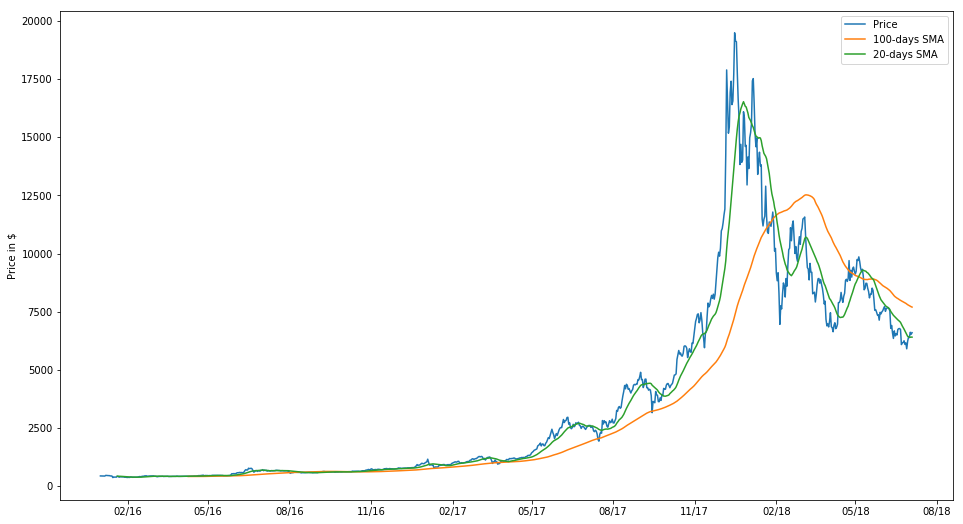

In [17]:
start_date = '2016-01-01'
end_date = '2018-07-04'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(final.loc[start_date:end_date, :].index, final.loc[start_date:end_date, 'bitcoin'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'bitcoin'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'bitcoin'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

SMA timeseries much less noisy than original price timeseries, but lag original price by about M/2 days[M = days used to calculate SMA]


Can consider using EMA which puts more weight on recent observations

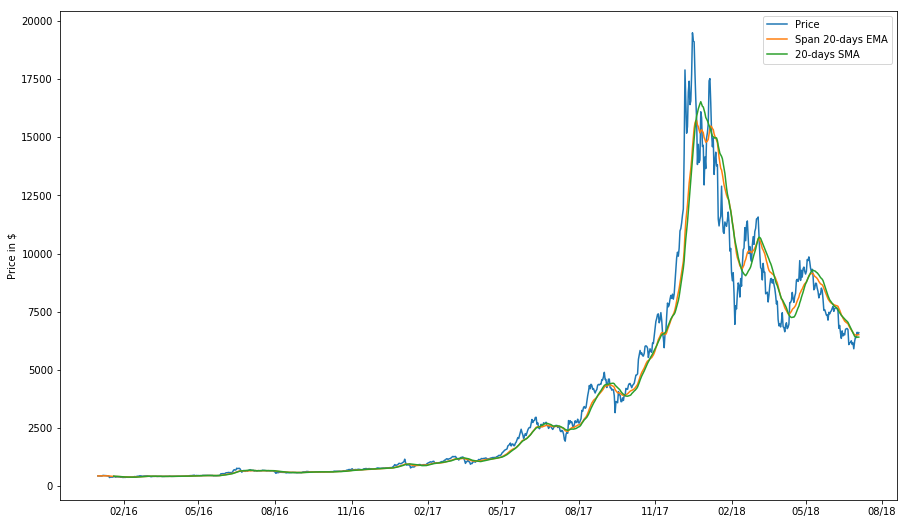

In [18]:
ema_short = final.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(final.loc[start_date:end_date, :].index, final.loc[start_date:end_date, 'bitcoin'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'bitcoin'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'bitcoin'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

Trading strategy: when price timeseries crosses EMA time series from below, close existing short position and go long (buy); if cross from above, close long and go short

In [19]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = final - ema_short
trading_positions_raw.tail()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2018-06-30,-96.577827,-15.792906,-31.436095,-1.456479,1.335216,-9.260675,-0.837102,-1.784116,-1.593951,-1.965693
2018-07-01,-103.828510,-16.695486,-29.582181,-1.245386,0.086148,-9.401087,-0.920236,-1.587057,-1.469289,-1.814675
2018-07-02,112.671348,-2.357345,-7.375783,-1.371063,9.786038,-3.963840,-1.058785,-0.024481,-0.813643,-0.637563
2018-07-03,25.406934,-12.492359,-16.770470,0.894752,7.008320,-3.731094,-1.383186,-0.338816,-1.188534,-0.667319
2018-07-04,84.474845,-5.104992,-12.341378,1.153347,6.286576,-3.022894,-1.106692,0.335833,-1.138673,-0.459003


In [20]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/10
trading_positions = trading_positions_raw.apply(np.sign) * 1/10
trading_positions.tail()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2018-06-30,-0.1,-0.1,-0.1,-0.1,0.1,-0.1,-0.1,-0.1,-0.1,-0.1
2018-07-01,-0.1,-0.1,-0.1,-0.1,0.1,-0.1,-0.1,-0.1,-0.1,-0.1
2018-07-02,0.1,-0.1,-0.1,-0.1,0.1,-0.1,-0.1,-0.1,-0.1,-0.1
2018-07-03,0.1,-0.1,-0.1,0.1,0.1,-0.1,-0.1,-0.1,-0.1,-0.1
2018-07-04,0.1,-0.1,-0.1,0.1,0.1,-0.1,-0.1,0.1,-0.1,-0.1


*Caveat*
close_price is the price of the asset at the close of day so we will not know that price>ema until the close of the trading day. Therefore, when calculating the returns of the strategy, to assume that on day to we had a long position is an error; it is equivalent to us peeking into the future, since we only know we have to go long at the end of day.

Hence, assume that we traded at the close of this day. Therefore our position will be long starting on the following day.. This is corrected for by lagging our trading positions by one day, so that on day to our actual position is that of the previous day and only on following day do we have a long position. Thus:

In [21]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

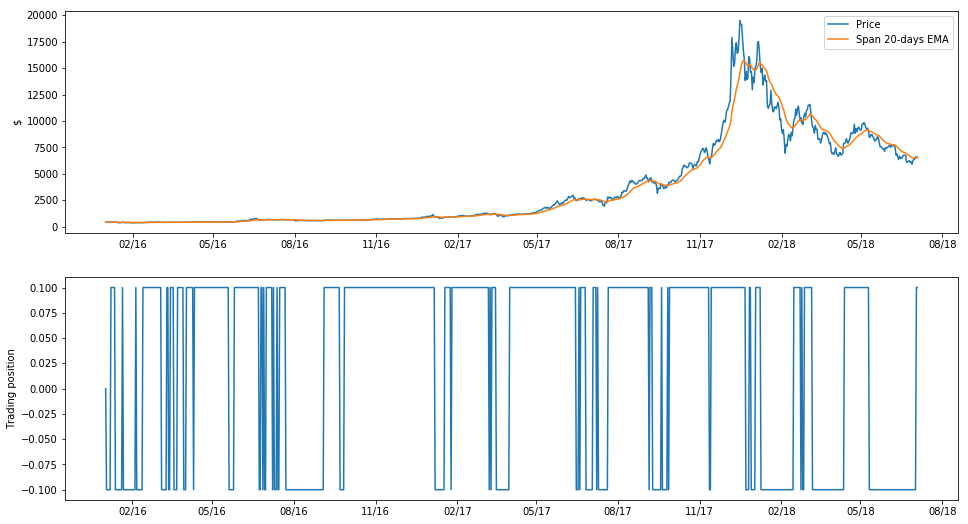

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(final.loc[start_date:end_date, :].index, final.loc[start_date:end_date, 'bitcoin'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'bitcoin'], label = 'Span 20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'bitcoin'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [23]:
asset_log_returns = np.log(final).diff()
asset_log_returns.head()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,-0.002051,-0.030032,-0.011564,0.056089,0.067565,-0.002853,-0.247724,0.101858,0.165495,-0.113151
2016-01-03,-0.007945,-0.012270,0.036442,-0.018349,-0.062666,-0.005731,0.009174,-0.015178,0.793186,0.008874
2016-01-04,0.007137,0.024391,-0.018091,-0.047402,0.033561,0.005731,-0.009174,-0.092877,-0.822095,0.052705
2016-01-05,-0.002613,0.003008,-0.004519,0.047402,-0.035642,-0.008608,0.036203,0.058991,-0.070892,-0.037611


In [24]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,bitcoin,dash,ethereum,bitcoindark,monero,litecoin,omni,factom,blocknet,counterparty
2018-06-30,-0.002943,-0.001744,-0.004303,-0.004392,-0.003282,-0.003247,0.000405,-0.005141,-0.009545,0.000267
2018-07-01,0.000284,0.001122,0.000277,-0.000154,-0.000951,0.001398,0.001050,-0.000334,0.000214,0.000536
2018-07-02,-0.003514,-0.005806,-0.004613,0.000521,0.007944,-0.006068,0.001477,-0.015968,-0.003982,-0.013906
2018-07-03,-0.001287,0.004692,0.002376,-0.004463,-0.001463,0.000188,0.002837,0.003367,0.003485,0.001176
2018-07-04,0.001035,-0.002834,-0.000672,0.000700,-0.000043,-0.000457,-0.000975,-0.006716,0.000498,-0.001876


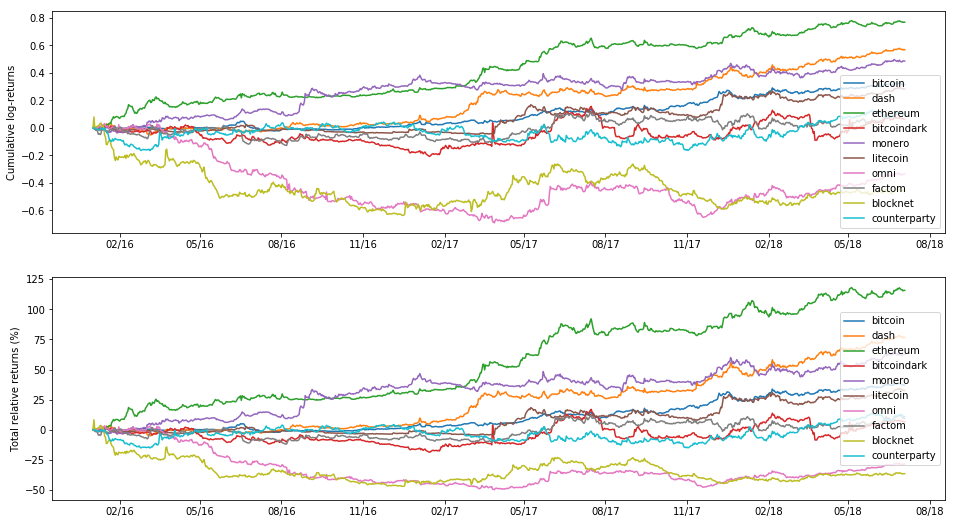

In [25]:
# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

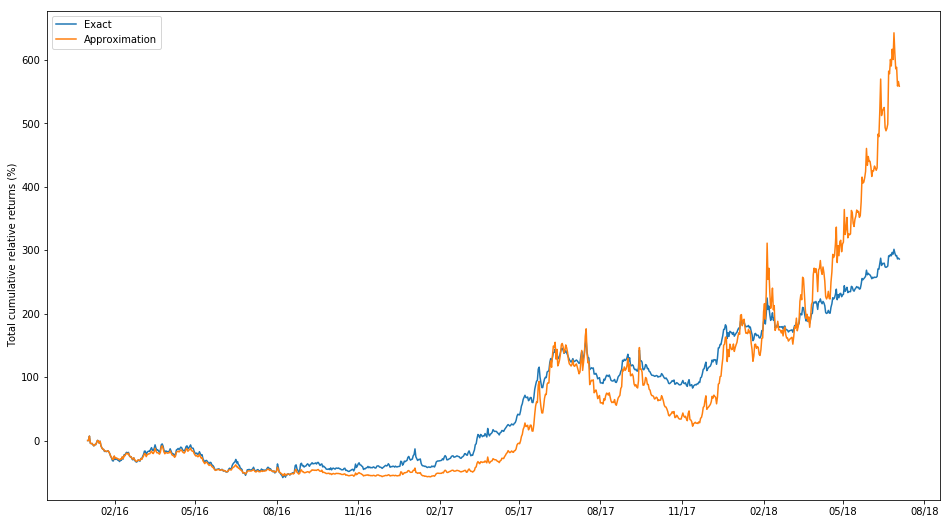

In [26]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [27]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 286.14%
Average yearly return is: 46.74%


Total portfolio return is: 500.66%
Average yearly return is: 66.34%


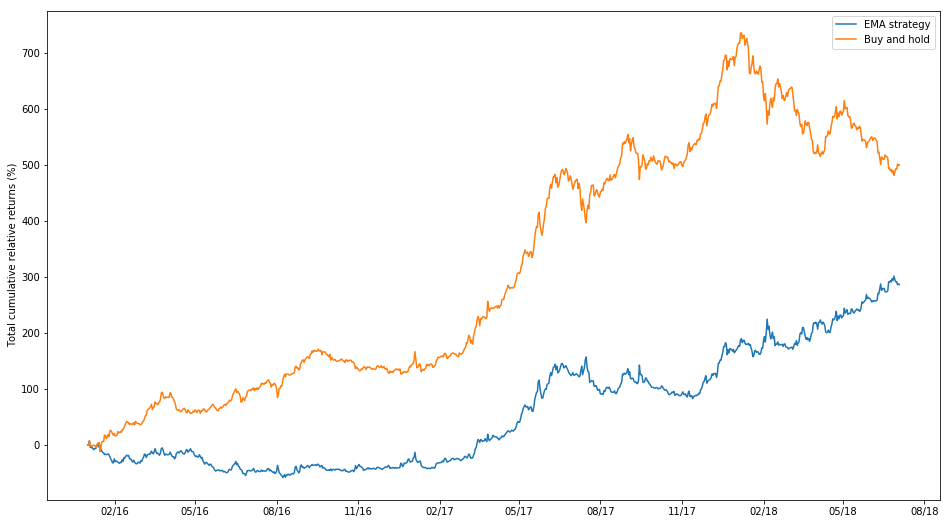

In [28]:
# Define the weights matrix for the simple buy-and-hold strategy
simple_weights_matrix = pd.DataFrame(1/10, index = final.index, columns=final.columns)

# Get the buy-and-hold strategy log returns per asset
simple_strategy_asset_log_returns = simple_weights_matrix * asset_log_returns

# Get the cumulative log-returns per asset
simple_cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
simple_cum_strategy_asset_relative_returns = np.exp(simple_cum_strategy_asset_log_returns) - 1

# Total strategy relative returns. This is the exact calculation.
simple_cum_relative_return_exact = simple_cum_strategy_asset_relative_returns.sum(axis=1)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='EMA strategy')
ax.plot(simple_cum_relative_return_exact.index, 100*simple_cum_relative_return_exact, label='Buy and hold')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

print_portfolio_yearly_statistics(simple_cum_relative_return_exact)

In [30]:
returns = np.exp (strategy_asset_log_returns) - 1

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

bitcoin         1.346562
dash            1.613125
ethereum        2.031298
bitcoindark     0.184756
monero          1.163451
litecoin        0.840561
omni           -0.448972
factom          0.247610
blocknet       -0.479824
counterparty    0.255660
dtype: float64


excess return is negative when the expected return on the portfolio is lower than the risk-free interest rate